- NOTE!: HERE We ASSUME that the datasets contains already S21, NOT the output power. We keep track of input power in each the dataset name.

Libraries and functions found on web to display content of a .h5 file

In [4]:
import h5py
import numpy as np
from h5utils import *
import matplotlib.pyplot as plt

In [5]:
filename = "03_03_4-8Ghz.h5";   # Change HERE!!!

Here you can see the content of the file

In [6]:
"""PRINT ALL the .h5 file directories"""
h5dump(filename,group = "/")

	 [ 0 ] - <HDF5 group "/" (3 members)>
		 [ 0 ] - <HDF5 group "/Off" (1 members)>
			 [ 0 ]- /Off/4.0GHz_8.0GHz_-15dBm : (2, 401)
		 [ 1 ] - <HDF5 group "/dc_0" (20 members)>
			 [ 0 ] - <HDF5 group "/dc_0/pumpfreq_0" (1 members)>
				 [ 0 ] - <HDF5 group "/dc_0/pumpfreq_0/pumppow_0" (1 members)>
					 [ 0 ]- /dc_0/pumpfreq_0/pumppow_0/4.0GHz_8.0GHz_-15dBm : (2, 401)
			 [ 1 ] - <HDF5 group "/dc_0/pumpfreq_1" (1 members)>
				 [ 0 ] - <HDF5 group "/dc_0/pumpfreq_1/pumppow_0" (1 members)>
					 [ 0 ]- /dc_0/pumpfreq_1/pumppow_0/4.0GHz_8.0GHz_-15dBm : (2, 401)
			 [ 2 ] - <HDF5 group "/dc_0/pumpfreq_10" (1 members)>
				 [ 0 ] - <HDF5 group "/dc_0/pumpfreq_10/pumppow_0" (1 members)>
					 [ 0 ]- /dc_0/pumpfreq_10/pumppow_0/4.0GHz_8.0GHz_-15dBm : (2, 401)
			 [ 3 ] - <HDF5 group "/dc_0/pumpfreq_11" (1 members)>
				 [ 0 ] - <HDF5 group "/dc_0/pumpfreq_11/pumppow_0" (1 members)>
					 [ 0 ]- /dc_0/pumpfreq_11/pumppow_0/4.0GHz_8.0GHz_-15dBm : (2, 401)
			 [ 4 ] - <HDF5 group "/dc_0/pumpfreq

In [7]:
"""Get simulation parameters"""
params_names, params_values = getDatasetValue(filename,"/",0)

# Print [Check if the order of paramerers is the same of the assegnation below!]
for i in np.arange(0,len(params_names)):
    print(str(params_names[i].decode("utf-8")),": ",str(params_values[i].decode("utf-8")))

# Vna
powerdBm = params_values[0] #[dBm]
navgs = params_values[3]
# Pump
freq_start = float(params_values[1])/1e9 #[GHz]
freq_stop = float(params_values[2])/1e9 #[Ghz]
ampl_min = float(params_values[3]) #[dBm]
ampl_max = float(params_values[4]) #[dBm]
# Bias
volt_min = float(params_values[5]) #[V]
volt_max = float(params_values[6]) #[V]
# You could retrieve current from resistance

# Points densities
n_freq = int(params_values[7])
n_ampl = int(params_values[8])
n_volt = int(params_values[9])

freqs = np.linspace(freq_start, freq_stop, n_freq) 
ampls = np.linspace(ampl_min, ampl_max, n_ampl)
volts = np.linspace(volt_min, volt_max, n_volt)

powerdBm :  -15
freq_start :  15700000000.0
freq_stop :  16125000000.0
ampl_min :  -20
ampl_max :  -20
volt_min :  0.26144
volt_max :  0.26144
n_freq :  20
n_ampl :  1
n_volt :  1
navgs :  1


In [8]:
"""Print parameters arrays"""

temp_str = ""
volt_cifers = 3
for i in np.arange(0,n_volt):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(volts[i], volt_cifers)) + "; "
print("Bias Voltage (V): ",temp_str)

temp_str = ""
freq_cifers = 3
for i in np.arange(0,n_freq):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(freqs[i], freq_cifers)) + "; "
print("Pump frequency (GHz): ",temp_str)

temp_str = ""
ampl_cifers = 3
for i in np.arange(0,n_ampl):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(ampls[i], ampl_cifers)) + "; "
print("Pump power (dBm): ",temp_str)

Bias Voltage (V):  [0] 0.261; 
Pump frequency (GHz):  [0] 15.7; [1] 15.722; [2] 15.745; [3] 15.767; [4] 15.789; [5] 15.812; [6] 15.834; [7] 15.857; [8] 15.879; [9] 15.901; [10] 15.924; [11] 15.946; [12] 15.968; [13] 15.991; [14] 16.013; [15] 16.036; [16] 16.058; [17] 16.08; [18] 16.103; [19] 16.125; 
Pump power (dBm):  [0] -20.0; 


Simulation parameters: 
Bias voltage:  0.261  V
Pump frequency:  15.722  GHz
Pump power:  -20.0 dBm





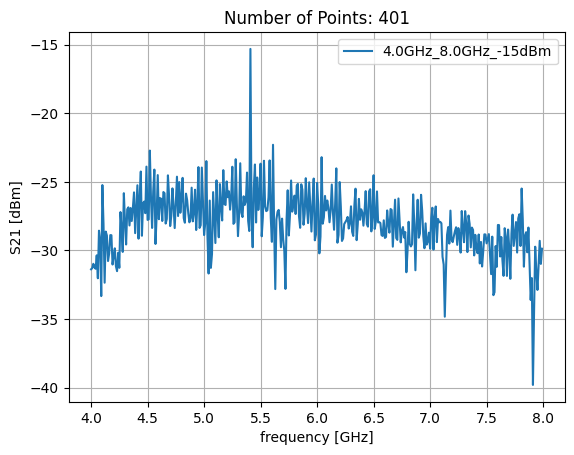

In [9]:
"""Plot (and get) a specific measure"""
dc_volt_index = 0
pump_freq_index = 1
pump_pow_index = 0


group = "/dc_" + str(dc_volt_index) + "/pumpfreq_" + str(pump_freq_index) + "/pumppow_" + str(pump_pow_index)

fmin = 4e9
fmax = 8e9

#group = "Off"

print("Simulation parameters: ")
print("Bias voltage: ", str(round(volts[dc_volt_index], volt_cifers)), " V")
print("Pump frequency: ", str(round(freqs[pump_freq_index], freq_cifers)), " GHz")
print("Pump power: ", str(round(ampls[pump_pow_index], ampl_cifers)), "dBm")
print("\n\n")
fig, ax = plotDatasetSpectrum(filename, group, 0, fmin, fmax)
xs, ys = getDatasetValue(filename, group, 0)

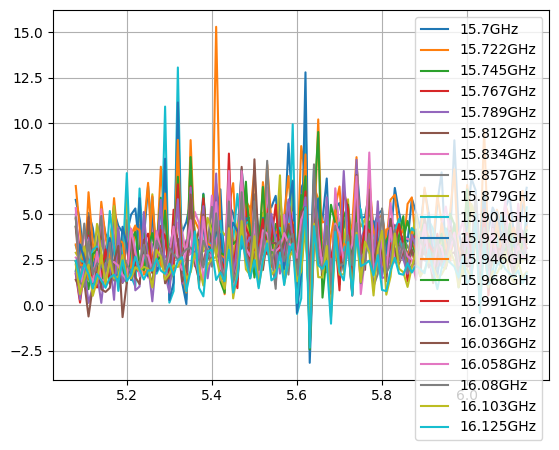

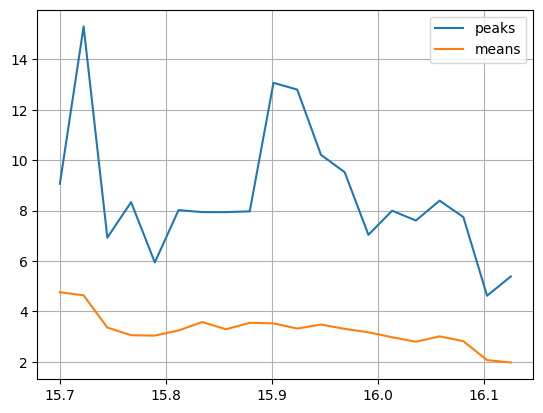

In [14]:
"""Subtract the OFF spectrum"""
xoff, yoff = getDatasetValue(filename, "Off", 0)

# Range of the mean
i_min = 108
i_max = 215
peaks = np.zeros(len(freqs))
means = np.zeros(len(freqs))
fig_1, ax_1 = plt.subplots()    # Plot spectrum differences
fig_2, ax_2 = plt.subplots()    # Plot 4-8 GHz band means
for i in np.arange(0,len(freqs)):
    group = "/dc_" + str(0) + "/pumpfreq_" + str(i) + "/pumppow_" + str(0)
    x, y = getDatasetValue(filename, group, 0)
    dy = y - yoff
    ax_1.plot(x[i_min:i_max]/1e9,dy[i_min:i_max],label=(str(round(freqs[i], freq_cifers)) + "GHz"))
    peaks[i] = max(dy[i_min:i_max])
    means[i] = np.mean(dy[i_min:i_max])

ax_2.plot(freqs, peaks, label="peaks")
ax_2.plot(freqs, means, label="means")
ax_1.legend()
ax_2.legend()
ax_1.grid()
ax_2.grid()

In [ ]:
"""DELETE a dataset"""
full_dataset_path = "/aaa"
deleteDataset(filename, full_dataset_path)

In [ ]:
"""Save a dataset"""
filename_save = "save.h5"
full_dataset_path = "/group/datasetname"

mat = [xs1, ys1]
hf = h5py.File(filename_save, 'a')
hf.create_dataset(full_dataset_path, data = mat)
hf.close()